In [1]:
import json
from PIL import Image
from IPython.display import display
import os
import random
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np

def expand2square(pil_img, background_color):
    width, height = pil_img.size
    if width == height:
        return pil_img
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return result
    
def find_bounds(image):
    """找到图像中非白色区域的边界"""
    # 将图像转换为numpy数组
    np_image = np.array(image)
    
    # 找出所有非白色的像素点
    non_white_pixels = np.any(np_image < [250, 250, 250], axis=-1)
    rows, cols = np.where(non_white_pixels)
    
    # 获取非白色像素点的最小和最大坐标
    min_row, max_row = rows.min(), rows.max()
    min_col, max_col = cols.min(), cols.max()
    
    return min_row, max_row, min_col, max_col

def crop(image, buffer=20):
    """在确保不丢失关键信息的前提下，剪裁图像"""
    min_row, max_row, min_col, max_col = find_bounds(image)
    
    # 添加缓冲区以确保不剪掉边界附近的重要信息
    min_row = max(0, min_row - buffer)
    max_row = min(image.height, max_row + buffer)
    min_col = max(0, min_col - buffer)
    max_col = min(image.width, max_col + buffer)
    
    # 剪裁图像
    return image.crop((min_col, min_row, max_col, max_row))


In [2]:
predition_root_path = '../outputs/model_predict/geouni-512x512-0208'
gt_ori_root_path = '../data/formalgeo7k/formalgeo7k_v2/problems_withAns'
image_root_path = '../data/formalgeo7k/formalgeo7k_v2'

# 读取Formalization和Reasoning数据

In [3]:
formalization_cn = []
with open(os.path.join(predition_root_path, 'formalization_cn.jsonl'), 'r') as f:
    for line in f:
        formalization_cn.append(json.loads(line))
        
formalization_en = []
with open(os.path.join(predition_root_path, 'formalization_en.jsonl'), 'r') as f:
    for line in f:
        formalization_en.append(json.loads(line))

formalization_cali_cn = []
with open(os.path.join(predition_root_path, 'formalization_cali_cn.jsonl'), 'r') as f:
    for line in f:
        formalization_cali_cn.append(json.loads(line))
        
formalization_cali_en = []
with open(os.path.join(predition_root_path, 'formalization_cali_en.jsonl'), 'r') as f:
    for line in f:
        formalization_cali_en.append(json.loads(line))
        
test_reasoning_en = []
with open(os.path.join(predition_root_path, 'test_reasoning_en.jsonl'), 'r') as f:
    for line in f:
        test_reasoning_en.append(json.loads(line))
        
test_reasoning_cn = []
with open(os.path.join(predition_root_path, 'test_reasoning_cn.jsonl'), 'r') as f:
    for line in f:
        test_reasoning_cn.append(json.loads(line))
        
test_reasoning_choice_en = []
with open(os.path.join(predition_root_path, 'test_reasoning_choice_en.jsonl'), 'r') as f:
    for line in f:
        test_reasoning_choice_en.append(json.loads(line))
        
test_reasoning_choice_cn = []
with open(os.path.join(predition_root_path, 'test_reasoning_choice_cn.jsonl'), 'r') as f:
    for line in f:
        test_reasoning_choice_cn.append(json.loads(line))


test_reasoning_en_pre_formalization = []
with open(os.path.join(predition_root_path, 'test_reasoning_en_pre_formalization.jsonl'), 'r') as f:
    for line in f:
        test_reasoning_en_pre_formalization.append(json.loads(line))
        
test_reasoning_cn_pre_formalization = []
with open(os.path.join(predition_root_path, 'test_reasoning_cn_pre_formalization.jsonl'), 'r') as f:
    for line in f:
        test_reasoning_cn_pre_formalization.append(json.loads(line))
        
test_reasoning_choice_en_pre_formalization = []
with open(os.path.join(predition_root_path, 'test_reasoning_choice_en_pre_formalization.jsonl'), 'r') as f:
    for line in f:
        test_reasoning_choice_en_pre_formalization.append(json.loads(line))
        
test_reasoning_choice_cn_pre_formalization = []
with open(os.path.join(predition_root_path, 'test_reasoning_choice_cn_pre_formalization.jsonl'), 'r') as f:
    for line in f:
        test_reasoning_choice_cn_pre_formalization.append(json.loads(line))


test_mixing_en_problem = []
with open(os.path.join(predition_root_path, 'test_mixing_en_problem.jsonl'), 'r') as f:
    for line in f:
        test_mixing_en_problem.append(json.loads(line))

test_mixing_cn_problem = []
with open(os.path.join(predition_root_path, 'test_mixing_cn_problem.jsonl'), 'r') as f:
    for line in f:
        test_mixing_cn_problem.append(json.loads(line))


test_mixing_en_problem_ans = []
with open(os.path.join(predition_root_path, 'test_mixing_en_problem_ans.jsonl'), 'r') as f:
    for line in f:
        test_mixing_en_problem_ans.append(json.loads(line))

test_mixing_cn_problem_ans = []
with open(os.path.join(predition_root_path, 'test_mixing_cn_problem_ans.jsonl'), 'r') as f:
    for line in f:
        test_mixing_cn_problem_ans.append(json.loads(line))
        
        
test_mixing_en_problem_choice = []
with open(os.path.join(predition_root_path, 'test_mixing_en_problem_choice.jsonl'), 'r') as f:
    for line in f:
        test_mixing_en_problem_choice.append(json.loads(line))

test_mixing_cn_problem_choice = []
with open(os.path.join(predition_root_path, 'test_mixing_cn_problem_choice.jsonl'), 'r') as f:
    for line in f:
        test_mixing_cn_problem_choice.append(json.loads(line))


test_mixing_en_problem_ans_choice = []
with open(os.path.join(predition_root_path, 'test_mixing_en_problem_ans_choice.jsonl'), 'r') as f:
    for line in f:
        test_mixing_en_problem_ans_choice.append(json.loads(line))

test_mixing_cn_problem_ans_choice = []
with open(os.path.join(predition_root_path, 'test_mixing_cn_problem_ans_choice.jsonl'), 'r') as f:
    for line in f:
        test_mixing_cn_problem_ans_choice.append(json.loads(line))


# 可视化Formalization

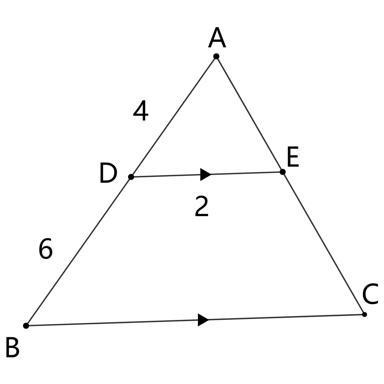

prob_id: 4985
GT ConsCDL: Shape(AD,DE,EA), Shape(DB,BC,CE,ED), Collinear(ADB), Collinear(AEC)
GT ImageCDL: Equal(LengthOfLine(AD),4), Equal(LengthOfLine(DB),6), Equal(LengthOfLine(DE),2), ParallelBetweenLine(DE,BC)
**********
<formalization>consCDL: Shape(AB,BM,MA), Shape(MB,BD,DM), Shape(MD,DC,CM), Collinear(AMD), Collinear(BMC)
imgCDL: Equal(LengthOfLine(AB),LengthOfLine(CD)), Equal(LengthOfLine(BM),1), Equal(LengthOfLine(DM),2)</formalization>

**********
<formalization>consCDL: Shape(AB,BM,MA), Shape(MB,BD,DM), Shape(MD,DC,CM), Collinear(AMD), Collinear(BMC)
imgCDL: Equal(LengthOfLine(AB),LengthOfLine(CD)), Equal(LengthOfLine(BM),1), Equal(LengthOfLine(DM),2)</formalization>

**********
<formalization>init consCDL: Shape(AD,DE,EA), Collinear(ADB), Collinear(AEC), Shape(DB,BC,CE,ED)
init imgCDL: Equal(LengthOfLine(AD),2), Equal(LengthOfLine(DE),1), ParallelBetweenLine(DE,BC), Equal(LengthOfLine(DB),3)
consCDL: Shape(AD,DE,EA), Shape(DB,BC,CE,ED), Collinear(ADB), Collinear(AEC)
imgCD

In [39]:
idx = random.sample(range(len(formalization_cn)), 1)[0]
assert formalization_en[idx]['question_id'] == formalization_cn[idx]['question_id'] == formalization_cali_en[idx]['question_id'] == formalization_cali_cn[idx]['question_id']
prob_id = formalization_en[idx]['question_id']
image = Image.open(os.path.join(image_root_path, f'diagrams/{prob_id}.png')).convert('RGB')
image = expand2square(crop(image), (255, 255, 255))
display(image.resize((384, 384)))
print(f'prob_id: {prob_id}')
with open(os.path.join(gt_ori_root_path, f"{prob_id}.json"), 'r') as f:
    ori_info = json.load(f)
gt_consCDL = ', '.join(ori_info['construction_cdl'])
gt_imgCDL = ', '.join(ori_info['image_cdl'])
print(f'GT ConsCDL: {gt_consCDL}\nGT ImageCDL: {gt_imgCDL}')
print("*" * 10)
print(formalization_en[idx]['response'] + '\n')
print("*" * 10)
print(formalization_cn[idx]['response'] + '\n')
print("*" * 10)
print(formalization_cali_en[idx]['response'] + '\n')
print("*" * 10)
print(formalization_cali_cn[idx]['response'] + '\n')

# 可视化Reasoning

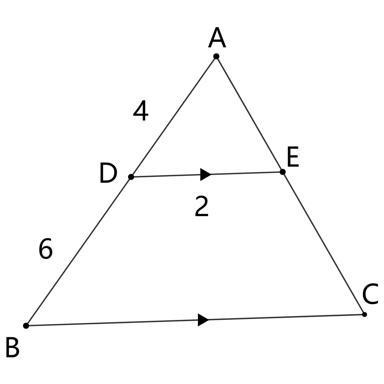

problem_text_cn: 如图所示，AD=4，DB=6，DE=2，DE∥BC。求直线BC的长度。
problem_answer: 5
choices: ['2', '3', '4', '5']
GT ConsCDL: Shape(AD,DE,EA), Shape(DB,BC,CE,ED), Collinear(ADB), Collinear(AEC)
GT ImageCDL: Equal(LengthOfLine(AD),4), Equal(LengthOfLine(DB),6), Equal(LengthOfLine(DE),2), ParallelBetweenLine(DE,BC)
**********
Answer the question based on the provided geometry image.
Question: As shown in the diagram, AD=4, DB=6, DE=2, DE is parallel to BC. Find the length of line BC.

<think>According to the problem, we know that AD=4, DB=6, DE=2, and DE is parallel to BC. From the properties of parallel lines, we can deduce that ∠ADE=∠DBC, and also that ∠BCE=∠DEA. Thus, triangle ADE is similar to triangle ABC.

Using the property of similar triangles, we know that the sides are in proportion. We can establish a relationship between AB and AD. Clearly, AB=AD+DB, which gives us AB=4+6=10. From the similarity, we can find the ratio (Ratio) as AB/AD=10/4=5/2.

Furthermore, using the proportional relatio

In [40]:
display(image.resize((384, 384)))
problem_text_en = ori_info['problem_text_en']
problem_text_cn = ori_info['problem_text_cn']
problem_answer = ori_info['problem_answer']
formalSSS_Solution = ori_info['formalSSS_Solution']
ori_qa = ori_info['origin_qa']
ori_q = ori_qa['Question']
ori_a = ori_qa['Solution']
Choices = ori_qa['Choices']
print(f'problem_text_cn: {problem_text_cn}')
print(f'problem_answer: {problem_answer}')
print(f'choices: {Choices}')
print(f'GT ConsCDL: {gt_consCDL}\nGT ImageCDL: {gt_imgCDL}')
print("*" * 10)
print(test_reasoning_en[idx]['prompt'] + '\n')
print(test_reasoning_en[idx]['response'] + '\n')
print("*" * 10)
print(test_reasoning_cn[idx]['prompt'] + '\n')
print(test_reasoning_cn[idx]['response'] + '\n')
print("*" * 10)
print(test_reasoning_choice_en[idx]['prompt'] + '\n')
print(test_reasoning_choice_en[idx]['response'] + '\n')
print("*" * 10)
print(test_reasoning_choice_cn[idx]['prompt'] + '\n')
print(test_reasoning_choice_cn[idx]['response'] + '\n')
print("*" * 10)
print(test_reasoning_en_pre_formalization[idx]['prompt'] + '\n')
print(test_reasoning_en_pre_formalization[idx]['response'] + '\n')
print("*" * 10)
print(test_reasoning_cn_pre_formalization[idx]['prompt'] + '\n')
print(test_reasoning_cn_pre_formalization[idx]['response'] + '\n')
print("*" * 10)
print(test_reasoning_choice_en_pre_formalization[idx]['prompt'] + '\n')
print(test_reasoning_choice_en_pre_formalization[idx]['response'] + '\n')
print("*" * 10)
print(test_reasoning_choice_cn_pre_formalization[idx]['prompt'] + '\n')
print(test_reasoning_choice_cn_pre_formalization[idx]['response'] + '\n')

# 可视化t2i

In [41]:
gen_img_cdl2i_cn = Image.open(os.path.join(predition_root_path, 'gen_imgs_cdl2i_cn', f'geouni_{prob_id}.png')).convert('RGB')
gen_img_cdl2i_en = Image.open(os.path.join(predition_root_path, 'gen_imgs_cdl2i_en', f'geouni_{prob_id}.png')).convert('RGB')
gen_imgs_caption2i_cn = Image.open(os.path.join(predition_root_path, 'gen_imgs_caption2i_cn', f'geouni_{prob_id}.png')).convert('RGB')
gen_imgs_caption2i_en = Image.open(os.path.join(predition_root_path, 'gen_imgs_caption2i_en', f'geouni_{prob_id}.png')).convert('RGB')
gen_imgs_gpt_caption2i_cn = Image.open(os.path.join(predition_root_path, 'gen_imgs_gpt_caption2i_cn', f'geouni_{prob_id}.png')).convert('RGB')
gen_imgs_gpt_caption2i_en = Image.open(os.path.join(predition_root_path, 'gen_imgs_gpt_caption2i_en', f'geouni_{prob_id}.png')).convert('RGB')

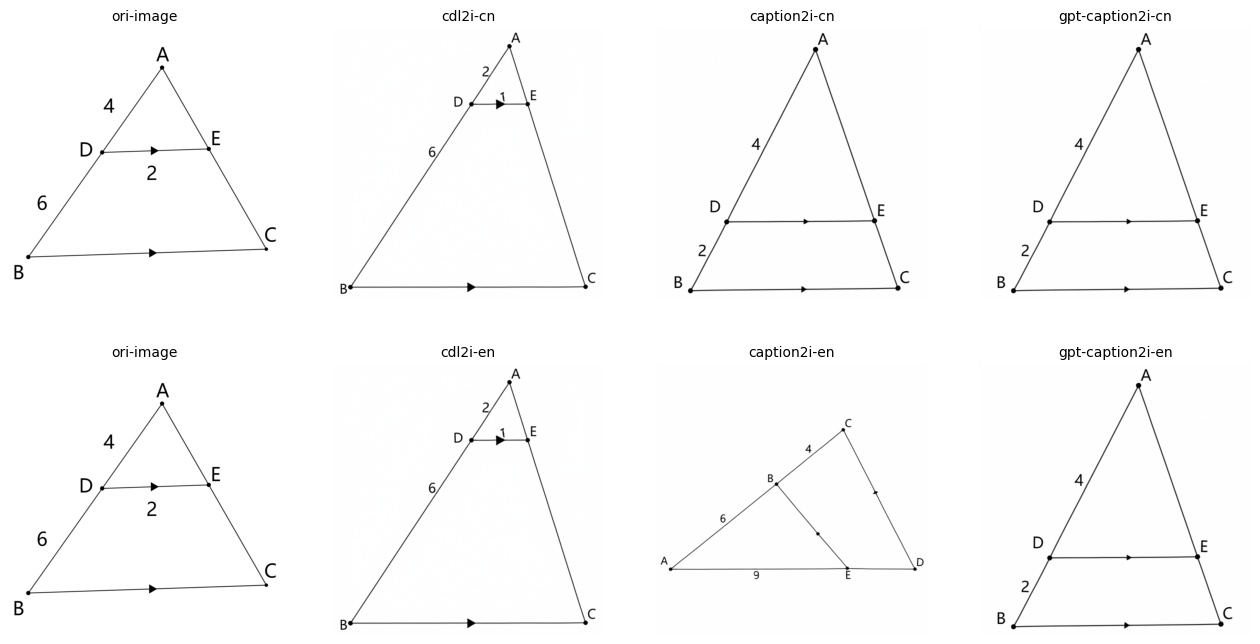

In [42]:
# 假设你已经有8张图片，存放在一个列表里
images = [image, gen_img_cdl2i_cn, gen_imgs_caption2i_cn, gen_imgs_gpt_caption2i_cn, 
          image, gen_img_cdl2i_en, gen_imgs_caption2i_en, gen_imgs_gpt_caption2i_en]
captions = ["ori-image", "cdl2i-cn", "caption2i-cn", "gpt-caption2i-cn", 
          "ori-image", "cdl2i-en", "caption2i-en", "gpt-caption2i-en", 
]

# 创建一个2x4的图像网格
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 设置图像大小
axes = axes.flatten()  # 将 2x4 的数组展平

# 绘制每张图像并添加caption
for i, ax in enumerate(axes):
    ax.imshow(images[i])  # 显示图像
    ax.set_title(captions[i], fontsize=10)  # 设置标题
    ax.axis('off')  # 关闭坐标轴

# 调整子图之间的间距
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

# 可视化Mixing出题

In [43]:
mixing_en_problem_img = Image.open(os.path.join(predition_root_path, "test_mixing_en_problem", f"Prob_{prob_id}_Img_0.png")).convert("RGB")
assert test_mixing_en_problem[idx]['question_id'] == prob_id
mixing_en_problem = test_mixing_en_problem[idx]['response']
mixing_en_prompt = test_mixing_en_problem[idx]['prompt']

mixing_cn_problem_img = Image.open(os.path.join(predition_root_path, "test_mixing_cn_problem", f"Prob_{prob_id}_Img_0.png")).convert("RGB")
assert test_mixing_cn_problem[idx]['question_id'] == prob_id
mixing_cn_problem = test_mixing_cn_problem[idx]['response']
mixing_cn_prompt = test_mixing_cn_problem[idx]['prompt']

mixing_en_problem_img_ans = Image.open(os.path.join(predition_root_path, "test_mixing_en_problem_ans", f"Prob_{prob_id}_Img_0.png")).convert("RGB")
assert test_mixing_en_problem_ans[idx]['question_id'] == prob_id
mixing_en_problem_ans = test_mixing_en_problem_ans[idx]['response']
mixing_en_prompt_ans = test_mixing_en_problem_ans[idx]['prompt']

mixing_cn_problem_img_ans = Image.open(os.path.join(predition_root_path, "test_mixing_cn_problem_ans", f"Prob_{prob_id}_Img_0.png")).convert("RGB")
assert test_mixing_cn_problem_ans[idx]['question_id'] == prob_id
mixing_cn_problem_ans = test_mixing_cn_problem_ans[idx]['response']
mixing_cn_prompt_ans = test_mixing_cn_problem_ans[idx]['prompt']


mixing_en_problem_img_choice = Image.open(os.path.join(predition_root_path, "test_mixing_en_problem_choice", f"Prob_{prob_id}_Img_0.png")).convert("RGB")
assert test_mixing_en_problem_choice[idx]['question_id'] == prob_id
mixing_en_problem_choice = test_mixing_en_problem_choice[idx]['response']
mixing_en_prompt_choice = test_mixing_en_problem_choice[idx]['prompt']

mixing_cn_problem_img_choice = Image.open(os.path.join(predition_root_path, "test_mixing_cn_problem_choice", f"Prob_{prob_id}_Img_0.png")).convert("RGB")
assert test_mixing_cn_problem_choice[idx]['question_id'] == prob_id
mixing_cn_problem_choice = test_mixing_cn_problem_choice[idx]['response']
mixing_cn_prompt_choice = test_mixing_cn_problem_choice[idx]['prompt']

mixing_en_problem_img_ans_choice = Image.open(os.path.join(predition_root_path, "test_mixing_en_problem_ans_choice", f"Prob_{prob_id}_Img_0.png")).convert("RGB")
assert test_mixing_en_problem_ans_choice[idx]['question_id'] == prob_id
mixing_en_problem_ans = test_mixing_en_problem_ans_choice[idx]['response']
mixing_en_prompt_ans_choice = test_mixing_en_problem_ans_choice[idx]['prompt']

mixing_cn_problem_img_ans_choice = Image.open(os.path.join(predition_root_path, "test_mixing_cn_problem_ans_choice", f"Prob_{prob_id}_Img_0.png")).convert("RGB")
assert test_mixing_cn_problem_ans_choice[idx]['question_id'] == prob_id
mixing_cn_problem_ans_choice = test_mixing_cn_problem_ans_choice[idx]['response']
mixing_cn_prompt_ans_choice = test_mixing_cn_problem_ans_choice[idx]['prompt']

根据提供的知识点绘图并出题。知识点：线段加法、平行线的性质、相似三角形判定定理（AA）、相似三角形性质、比例关系的计算。


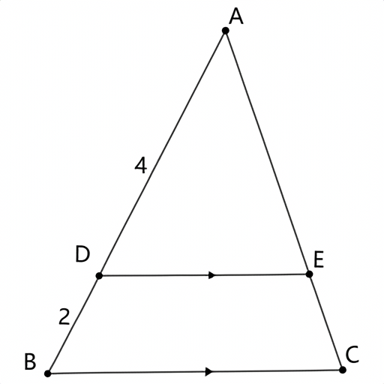

题目：如图所示，AD=4，DB=2，DE平行于BC。求直线DE的长度与直线BC的长度之比。
##########
根据提供的知识点绘图、出题并解答。知识点：线段加法、平行线的性质、相似三角形判定定理（AA）、相似三角形性质、比例关系的计算。


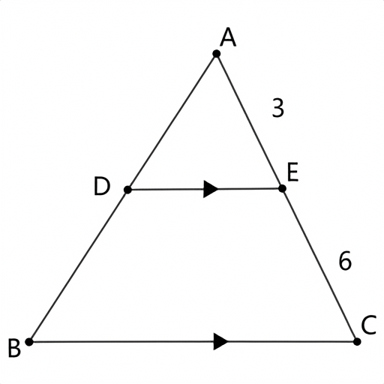

题目：如图所示，AD/AB=x，AE=3，EC=6，DE∥BC。求x的值。
解答：<think>根据题意，设定已知条件：EC=6，AE=3，DE平行于BC。由此可以得出AC=AE+EC，进而计算得AC=9。

由于DE平行于BC，根据平行线的性质，我们可以得到∠ADE=∠DBC和∠BCE=∠DEA。这表明三角形ADE与三角形ABC是相似三角形。

根据相似三角形的性质，边成比例，我们可以得出AC与AE的比值。结合已知条件计算，得到这一比例为1/3。进一步推导得出，AB与AD的比例也为1/3，因此x=AD/AB可以得出x=1/3。</think><answer>\boxed{1/3}</answer>
##########
根据提供的知识点绘图、出题（选择题）。知识点：线段加法、平行线的性质、相似三角形判定定理（AA）、相似三角形性质、比例关系的计算。


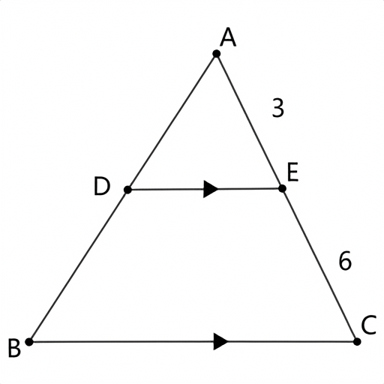

题目：如图所示，AD/AB=x，AE=3，EC=6，DE∥BC。求x的值。
A: \frac{1}{2}
B: \frac{1}{3}
C: \frac{1}{4}
D:\frac{1}{6}
##########
根据提供的知识点绘图、出题（选择题）并解答。知识点：线段加法、平行线的性质、相似三角形判定定理（AA）、相似三角形性质、比例关系的计算。


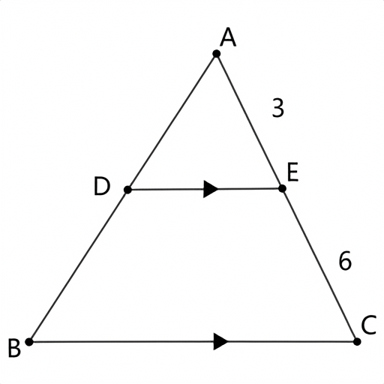

题目：如图所示，AD/AB=x，AE=3，EC=6，DE∥BC。求x的值。
A: \frac{1}{2}
B: \frac{1}{3}
C: \frac{1}{4}
D:\frac{1}{6}
解答：<think>根据题意，设定已知条件：EC=6，AE=3，DE平行于BC。由此可以得出AC=AE+EC，进而计算得AC=9。

由于DE平行于BC，根据平行线的性质，我们可以得到∠ADE=∠DBC和∠BCE=∠DEA。这表明三角形ADE与三角形ABC是相似三角形。

根据相似三角形的性质，边成比例，我们可以得出AC与AE的比值。结合已知条件计算，得到这一比例为1/3。进一步推导得出，AB与AD的比例也为1/3，因此x=AD/AB可以得出x=1/3。</think><answer>\boxed{1/3}</answer>


In [44]:
print(mixing_cn_prompt)
display(mixing_cn_problem_img.resize((384, 384)))
print(mixing_cn_problem)
print('#' * 10)

print(mixing_cn_prompt_ans)
display(mixing_cn_problem_img_ans.resize((384, 384)))
print(mixing_cn_problem_ans)
print('#' * 10)

print(mixing_cn_prompt_choice)
display(mixing_cn_problem_img_choice.resize((384, 384)))
print(mixing_cn_problem_choice)
print('#' * 10)

print(mixing_cn_prompt_ans_choice)
display(mixing_cn_problem_img_ans_choice.resize((384, 384)))
print(mixing_cn_problem_ans_choice)

